# Визуализация pandas и seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

Считаем тестовый набор данных

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Построим гистограмму распределения math score

<AxesSubplot:>

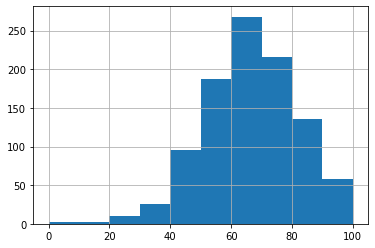

In [3]:
df['math score'].hist()

Построим scatter plot

<AxesSubplot:xlabel='math score', ylabel='reading score'>

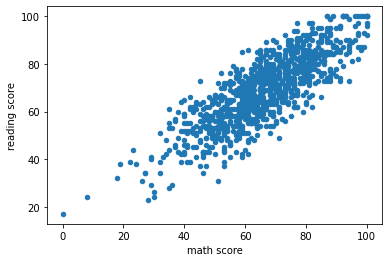

In [4]:
df.plot.scatter(x='math score', y='reading score')

Построим scatter plot библиотекой seaborn

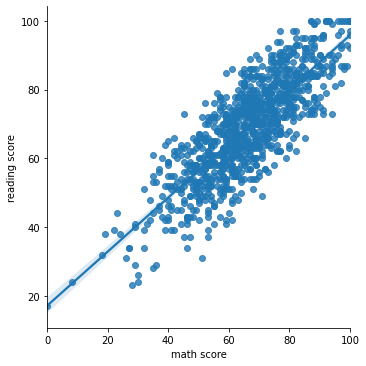

In [5]:
sns.lmplot(x='math score', y='reading score', data=df)

Добавим группирующую переменную пола

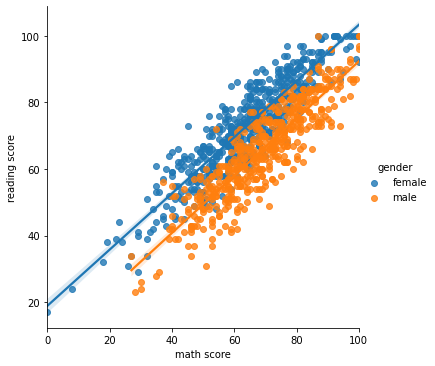

In [6]:
sns.lmplot(x='math score', y='reading score', hue='gender', data=df)

Отключим регрессионные прямые

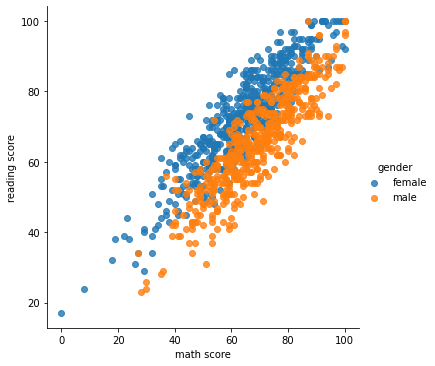

In [7]:
sns.lmplot(x='math score', y='reading score', hue='gender', data=df, fit_reg=False)

Кастомизируем график, задав оси

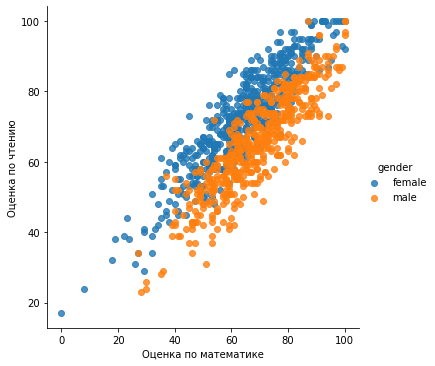

In [8]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=df, fit_reg=False)
ax.set_xlabels('Оценка по математике')
ax.set_ylabels('Оценка по чтению')

### Задание  
Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений)  
в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

<AxesSubplot:xlabel='x', ylabel='y'>

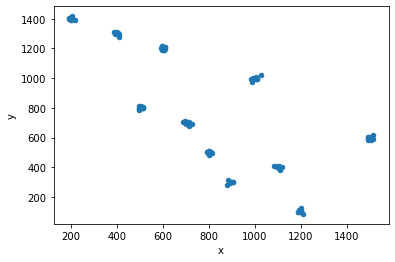

In [9]:
df = pd.read_csv('./data/dataset_209770_6.txt', sep=' ')

df.plot.scatter(x = 'x', y = 'y')

### Задание  
Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту.

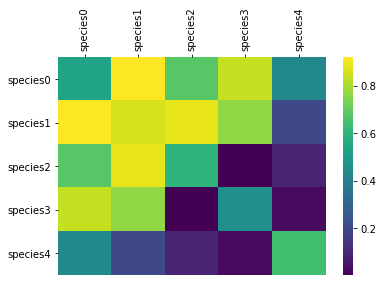

In [10]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)

g = sns.heatmap(cmap="viridis", data=df)
g.xaxis.set_ticks_position('top')  
g.xaxis.set_tick_params(rotation=90)

### Задание  
Пришло время узнать, какая роль в dota самая распространённая.  
Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (roles).  
Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно).  

<AxesSubplot:>

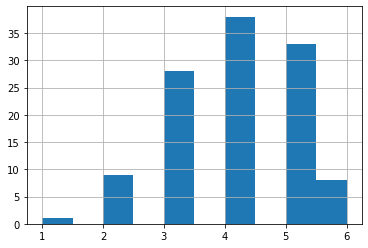

In [11]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

df['cnt'] = df.roles.str.count(',') + 1
df['cnt'].hist()

### Задание  
Магистрантка Адель решила изучить какие бывают ирисы.  
Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов,  
постройте их распределения.
Распределение должно быть по всем образцам, без разделения на вид.

C:\Users\nanob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nanob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nanob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

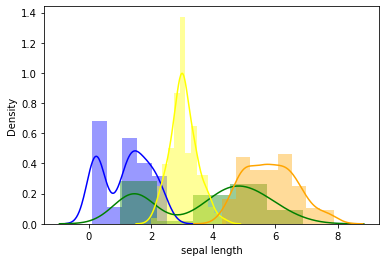

In [12]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

sns.distplot(df['petal width'], color = "blue")
sns.distplot(df['petal length'], color ="green")
sns.distplot(df['sepal width'], color = "yellow")
sns.distplot(df['sepal length'], color = "orange")

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом.  
Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота

<AxesSubplot:ylabel='petal length'>

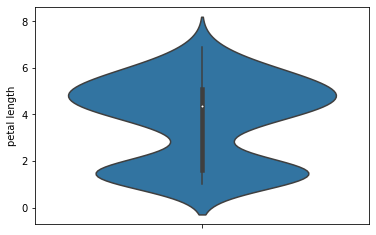

In [13]:
sns.violinplot(y='petal length', data=df)

 Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга,  
 а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей.

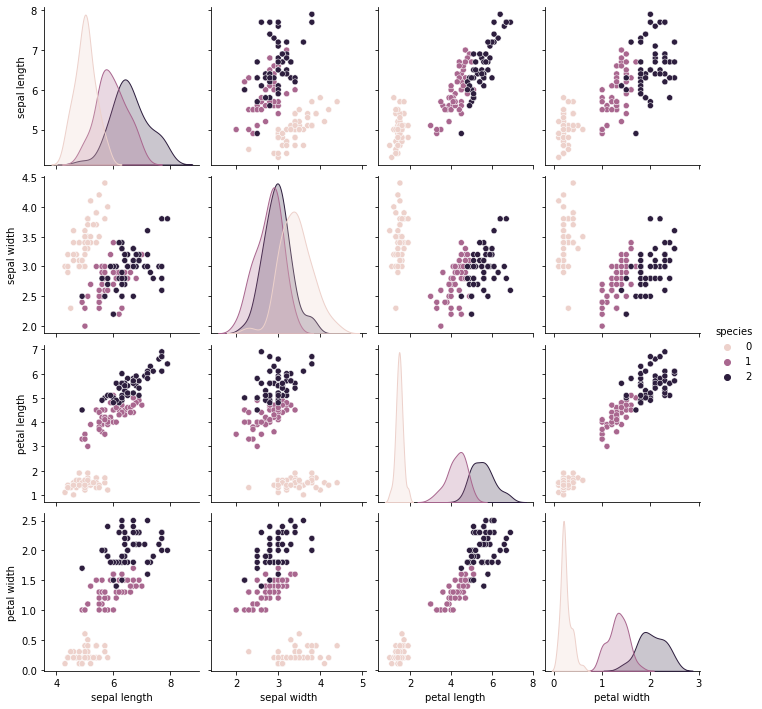

In [14]:
sns.pairplot(df, vars=df.columns[:4], hue="species")

<AxesSubplot:>

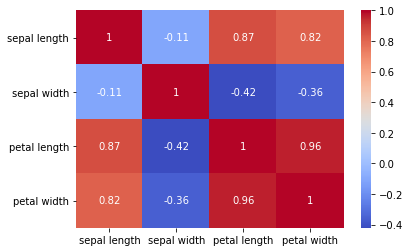

In [15]:
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap= 'coolwarm')